# TASK1. Используя ее функции, напишите свою функцию, которая на вход примет математическую функцию y=f(x) вида x**2 - x + 21, и вернёт производную: 2𝑥−1. 


In [ ]:
import sympy as sp
import math
from sympy import*
import numpy as np
import seaborn as sns

In [ ]:
x = sp.symbols('x')

In [ ]:
y = x**2 - x + 21

In [ ]:
yprime = y.diff(x)
print(yprime)

2*x - 1


# TASK2. Напишите свою функцию, которая на вход примет математическую функцию p = f(x, y), зависящую от двух переменных вида (x-y)**2, а также ту переменную, по которой нужно посчитать частную производную. Функция должна вернуть частную производную этой переменной: 2𝑥−2𝑦

In [ ]:
y = sp.symbols('y')

In [ ]:
p = (x-y)**2

In [ ]:
pprime = p.diff(x)
print(pprime)

2*x - 2*y


In [ ]:
pprime = p.diff(y)
print(pprime)

-2*x + 2*y


TASK3 Написать математическую функцию. Представьте, что у вас есть y_true и есть y_pred (предсказанное). Вам надо посчитать квадрат отклонения одного от другого. Причём предсказанное значение получается при помощи функции линейной регрессии: y = wx +b. Дополнительно поделим всё это на n.
Нужно написать функцию Python, которая примет на вход эту функцию, по которой нам надо посчитать частные производные. Нас будут интересовать w и b. Именно их наилучшие значения мы и будем в дальнейшем искать. Функция должна вернуть производные сразу по обеим этим переменным.



In [ ]:
w = sp.symbols('w')

In [ ]:
b = sp.symbols('b')

In [ ]:
n = sp.symbols('n')

In [ ]:
f = ((y-w*x+b)**2)/n

In [ ]:
w = diff(f,w)

In [ ]:
w

-2*x*(b - w*x + y)/n

In [ ]:
b = diff(f,b)

In [ ]:
b

(2*b - 2*w*x + 2*y)/n

TASK4 Написать класс Gradient(), который будет состоять из нескольких методов. Объект при инициализации получает два вектора: X, Y. Далее методы обращаются к ним уже внутри класса.
predict: на вход она получает w, b, на выход она выдаёт прогнозные значения Y_pred;
mse: на вход она получает Y_pred, на выход выдает посчитанное MSE;
update: на вход она получает w, b и 'a' (наш learning rate). Сделайте по умолчанию значение a=0.01. А на выходe метод выдаёт новые значения w, b, которые обновились благодаря посчитанным градиентам.
Проверить работу методов, подав на вход класса два вектора X, Y и начальные параметры w, b в требуемые методы.
P.S. Тут лучше все писать через numpy, потому что все вычисления будут в векторном виде. Через numpy это будет сделать удобнее)

In [ ]:
y_pred = w*x+b

In [ ]:
y_true = y

In [ ]:
class Gradient:
  LEARNING_RATE = 0.01


  def __init__(self, x, y):
    self.x = x
    self.y = y

  def predict(self, w=0, b=0):
    return w*self.x+b

  def mse(self, Y_pred):
    return sum((Y_pred - self.y)**2) / len(self.x)  

  def update(self, w=0, b=0):
    w_temp, b_temp = w, b
    w = w_temp - self.LEARNING_RATE * sum((2 * b_temp + 2 * w_temp * self.x - 2 * self.y) * self.x) / len(self.x)
    b = b_temp - self.LEARNING_RATE * sum(2 * b_temp + 2 * w_temp * self.x - 2 * self.y) / len(self.x)
    return w, b

  def optimize(self, num_iterations, stopping_threshold, w=0, b=0):
    Y_pred = self.predict(w, b)
    mse = self.mse(Y_pred)
    for _ in range(num_iterations):
      w, b = self.update(w, b)
      Y_pred = self.predict(w, b)
      if abs(mse - self.mse(Y_pred)) < stopping_threshold:
          return w, b, self.mse(Y_pred)
          
      mse = self.mse(Y_pred)
    return w, b, self.mse(Y_pred)


In [ ]:
n = 100
x = np.array(range(100))
y = 3 * x + 7 + np.random.normal(0, 1, n)
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[  6.47159779  10.64881032  14.27109633  13.50123899  19.02335316
  23.37858288  25.26089477  27.76042217  30.86785349  34.93004043
  37.73670561  39.0822557   42.43762454  45.81969459  50.24703941
  52.63844237  54.67363309  56.27313542  62.56887788  64.32645971
  66.84025724  69.90315991  71.03815678  75.49301675  80.24385047
  82.23073583  85.56003238  90.1930084   89.82056791  93.2219852
  97.3824201  100.41726318 102.54831916 105.30342579 110.62905323
 109.97946033 115.27419823 117.70258884 120.45732149 123.42710716
 126.24739634 129.15894974 134.36771829 136.19008145 139.39720636
 141.8200605  143.68095436 149.90682506 150.63179402 154.8604652
 156.76578972 160.23272196 163.84436

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


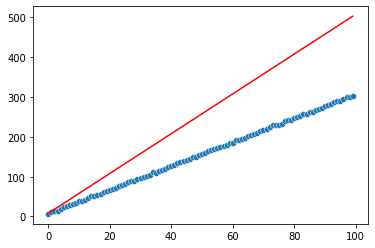

In [ ]:
sns.scatterplot(x, y)    
sns.lineplot(x=x, y=5 * x + 8, color='red')

In [ ]:
grad = Gradient(x=x, y=y)

In [ ]:
w = 5
b = 8
y_pred = grad.predict(w=w, b=b)
y_pred

array([  8,  13,  18,  23,  28,  33,  38,  43,  48,  53,  58,  63,  68,
        73,  78,  83,  88,  93,  98, 103, 108, 113, 118, 123, 128, 133,
       138, 143, 148, 153, 158, 163, 168, 173, 178, 183, 188, 193, 198,
       203, 208, 213, 218, 223, 228, 233, 238, 243, 248, 253, 258, 263,
       268, 273, 278, 283, 288, 293, 298, 303, 308, 313, 318, 323, 328,
       333, 338, 343, 348, 353, 358, 363, 368, 373, 378, 383, 388, 393,
       398, 403, 408, 413, 418, 423, 428, 433, 438, 443, 448, 453, 458,
       463, 468, 473, 478, 483, 488, 493, 498, 503])

In [ ]:
mse = grad.mse(y_pred)
mse


13347.73422880048

In [ ]:
grad.update(w=w, b=b)

(-127.39832183243331, 5.999516857020018)

In [ ]:
grad = Gradient(x=x, y=y)
grad.optimize(num_iterations=500, stopping_threshold=0.001, w=5, b=8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


(nan, nan, nan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


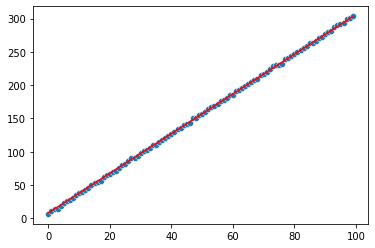

In [ ]:
sns.scatterplot(x, y)
sns.lineplot(x=x, y=2.980766807711668 * x + 7.969161098114252, color='red')
      